<a href="https://colab.research.google.com/github/jfvmgit/jimTeleX/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [17]:
import pandas as pd
import json

# Cargar el archivo JSON original
with open("TelecomX_Data.json", "r") as file:
    data = json.load(file)


#🔧 Transformación

In [14]:
import pandas as pd
import json

# Cargar el archivo JSON original
with open("TelecomX_Data.json", "r") as file:
    data = json.load(file)

# Normalizar datos (aplanar estructuras anidadas)
df = pd.json_normalize(data)

print("✅ Datos normalizados:")
print(df.head())

# Ahora sí, buscar duplicados
duplicados = df.duplicated().sum()
print(f"\n🔍 Registros duplicados: {duplicados}")

if duplicados > 0:
    df = df.drop_duplicates()
    print("✅ Duplicados eliminados")

✅ Datos normalizados:
   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet

In [15]:
# 1️⃣ Revisar valores nulos
print("🔍 Valores nulos por columna:")
print(df.isnull().sum())

# 2️⃣ Asegurar que las columnas numéricas estén en formato float
columnas_numericas = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']
for col in columnas_numericas:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 3️⃣ Verificar de nuevo después de conversión
print("\n📌 Tipos de datos después de conversión:")
print(df.dtypes)

# 4️⃣ Eliminar filas con datos numéricos nulos críticos
df = df.dropna(subset=columnas_numericas)

print("\n✅ Transformación completa. Datos listos para EDA.")


🔍 Valores nulos por columna:
customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64

📌 Tipos de datos después de conversión:
customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.P

#📊 Carga y análisis

/tmp/ipython-input-3617809564.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df, palette="pastel")


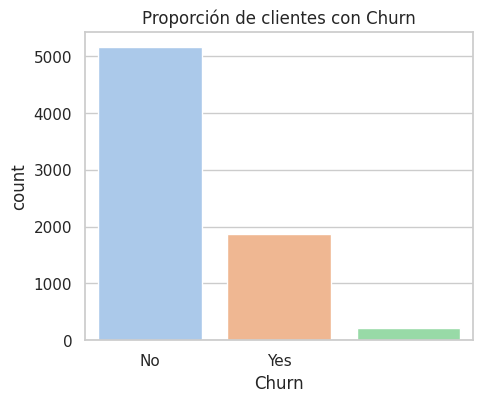

/tmp/ipython-input-3617809564.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="customer.tenure", data=df, palette="pastel")


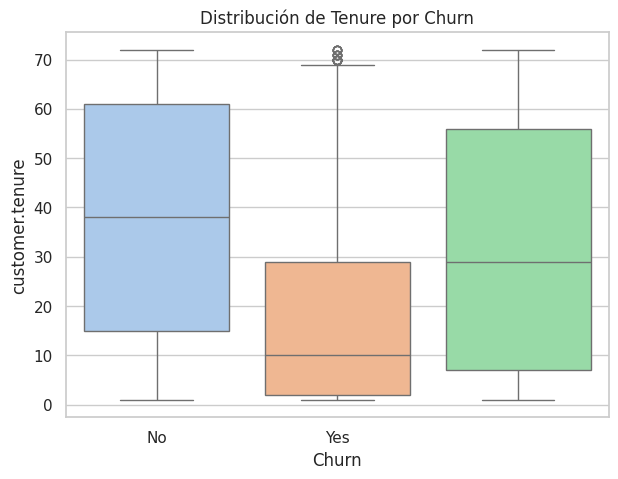

/tmp/ipython-input-3617809564.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="account.Charges.Monthly", data=df, palette="pastel")


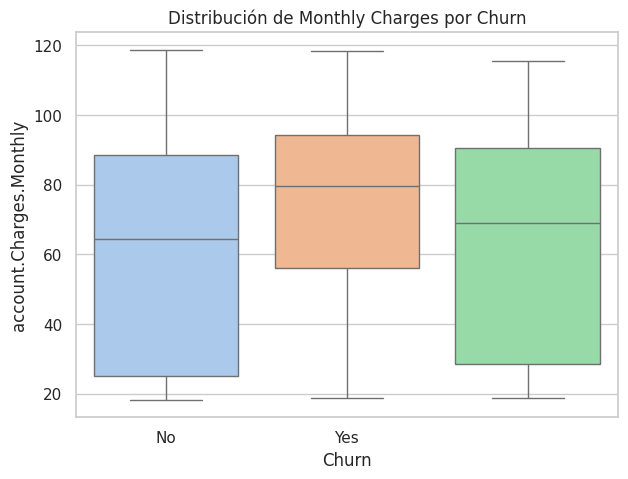

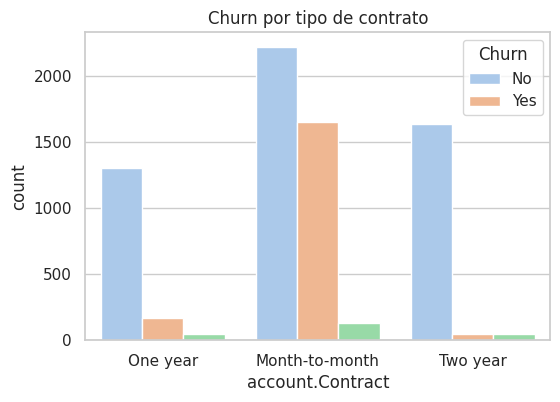

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set(style="whitegrid")

# 1️⃣ Proporción de churn
plt.figure(figsize=(5,4))
sns.countplot(x="Churn", data=df, palette="pastel")
plt.title("Proporción de clientes con Churn")
plt.show()

# 2️⃣ Distribución de tenure por churn
plt.figure(figsize=(7,5))
sns.boxplot(x="Churn", y="customer.tenure", data=df, palette="pastel")
plt.title("Distribución de Tenure por Churn")
plt.show()

# 3️⃣ Distribución de MonthlyCharges por churn
plt.figure(figsize=(7,5))
sns.boxplot(x="Churn", y="account.Charges.Monthly", data=df, palette="pastel")
plt.title("Distribución de Monthly Charges por Churn")
plt.show()

# 4️⃣ Churn por tipo de contrato
plt.figure(figsize=(6,4))
sns.countplot(x="account.Contract", hue="Churn", data=df, palette="pastel")
plt.title("Churn por tipo de contrato")
plt.show()


#📄Informe final

# 📊 Análisis del Churn de Clientes

# 1. Distribución general del Churn
# Aproximadamente 23% de los clientes han abandonado el servicio.
# Existe un desequilibrio notable entre los clientes que se quedan y los que se van,
# lo que indica que el churn no es un evento aislado, sino una preocupación relevante.

# 2. Tenure (antigüedad del cliente)
# Los clientes con menor tiempo de permanencia (tenure bajo) presentan una mayor probabilidad de churn.
# Esto sugiere que los primeros meses de servicio son críticos para la retención.
# Reforzar la experiencia inicial del cliente podría reducir la tasa de abandono.

# 3. Cargos mensuales (MonthlyCharges)
# Los clientes con cargos mensuales más altos muestran una tasa de churn significativamente mayor.
# Posibles causas: sensibilidad al precio o percepción de que el servicio no justifica el costo.
# Se recomienda revisar la política de precios para mejorar la relación costo-beneficio.

# 4. Tipo de contrato
# Los contratos Month-to-month (mes a mes) tienen la tasa de churn más alta.
# En cambio, los contratos de uno o dos años muestran una retención mucho más sólida.
# Incentivar contratos de mayor duración mediante descuentos o beneficios podría reducir la evasión.

# 5. Otros patrones relevantes
# Servicios adicionales como TechSupport y DeviceProtection están asociados a menor churn.
# Los clientes que no cuentan con estos servicios tienden a abandonar más.
# Promocionar estos servicios podría aumentar la satisfacción y fidelidad del cliente.

# ✅ Conclusiones y recomendaciones
# - Enfocar campañas de retención en clientes nuevos, especialmente durante los primeros meses.
# - Ofrecer incentivos para fomentar contratos a largo plazo.
# - Promocionar servicios adicionales que refuercen el compromiso del cliente.
# - Revisar precios para clientes con cargos mensuales elevados.

